In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('../input/sms-spam-collection-dataset/spam.csv',encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data=data.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)

In [5]:
data.columns=['type','message']

In [6]:
data.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.groupby('type').describe()

message                                                               
       count unique                                                top freq
type                                                                       
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [8]:
data['length'] = data['message'].apply(len)
data.head()

,type,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [9]:
data.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

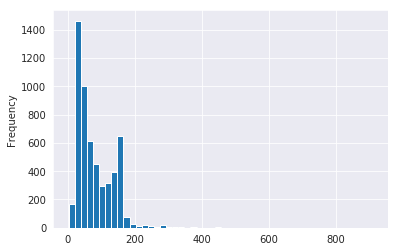

In [10]:
sns.set_style('darkgrid')
data['length'].plot(bins=50, kind='hist') 

In [11]:
import string 
from nltk.corpus import stopwords

In [12]:
def clean_text(message):
        no_punc=[char for char in message if char not in string.punctuation]
        no_punc=''.join(no_punc)
        return[word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [13]:
data.head()

,type,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
data['message'].head(5).apply(clean_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
msg_train,msg_test,type_train,type_test=train_test_split(data['message'],data['type'],test_size=.2)

In [17]:
from sklearn.naive_bayes import MultinomialNB

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [19]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bag_of_words', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tf-idf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),
])

In [20]:
pipeline.fit(msg_train,type_train)

Pipeline(memory=None,
         steps=[('bag_of_words',
                 CountVectorizer(analyzer=<function clean_text at 0x7f365a60f840>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tf-idf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [21]:
predictions = pipeline.predict(msg_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print('classification matrix is',classification_report(predictions,type_test))
print('confusion matrix is',confusion_matrix(predictions,type_test))

classification matrix is               precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1012
        spam       0.71      1.00      0.83       103

    accuracy                           0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115

confusion matrix is [[969  43]
 [  0 103]]
